In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import f_decline, f_decline_R50, f_decline_R75, f_decline_R100, f_decline_mixed
from MaaSSim.acceptance import RA_kpi_veh, RA_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [5]:
params = MaaSSim.utils.get_config('glance.json')
params.vehicle_fixed_positions = True
params.times.patience = 600 #in second
params.dist_threshold = 20000 #in meter
params.dist_threshold_min = 3000
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"

params.d2d.fuel_cost = 0.25 #euro/km
params.platforms.comm_rate = 0
params.platforms.base_fare = 2
params.platforms.fare = 1.2 
params.platforms.min_fare = 2
params.speeds.ride=10
params.times.decline=20
params.assert_me = False

params.paths.requests = 'Amsterdam_requests_new.csv'

params.nP = 1000
params.nV = 100
params.simTime = 4

pd.set_option('display.max_rows', 100)

In [6]:
sim_cm = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline, kpi_veh=RA_kpi_veh, kpi_pax=RA_kpi_pax)

12-06-22 21:56:52-WARNING-Setting up 4h simulation at 2022-06-12 19:56:04 for 100 vehicles and 1000 passengers in Amsterdam, Netherlands
12-06-22 21:57:01-INFO--------------------	Starting simulation	-------------------
12-06-22 21:57:02-WARNING-pax  512  got rejected by vehicle 1                2022-06-12 19:56:04
12-06-22 21:57:03-WARNING-pax  958  got rejected by vehicle 13               2022-06-12 19:57:28
12-06-22 21:57:03-WARNING-pax  460  got rejected by vehicle 80               2022-06-12 19:58:45
12-06-22 21:57:03-WARNING-pax  460  got rejected by vehicle 75               2022-06-12 19:59:15
12-06-22 21:57:04-WARNING-pax  860  got rejected by vehicle 35               2022-06-12 20:00:35
12-06-22 21:57:04-WARNING-pax  622  got rejected by vehicle 33               2022-06-12 20:01:06
12-06-22 21:57:05-WARNING-pax  637  got rejected by vehicle 3                2022-06-12 20:03:37
12-06-22 21:57:05-WARNING-pax  474  got rejected by vehicle 7                2022-06-12 20:04:18
12-0

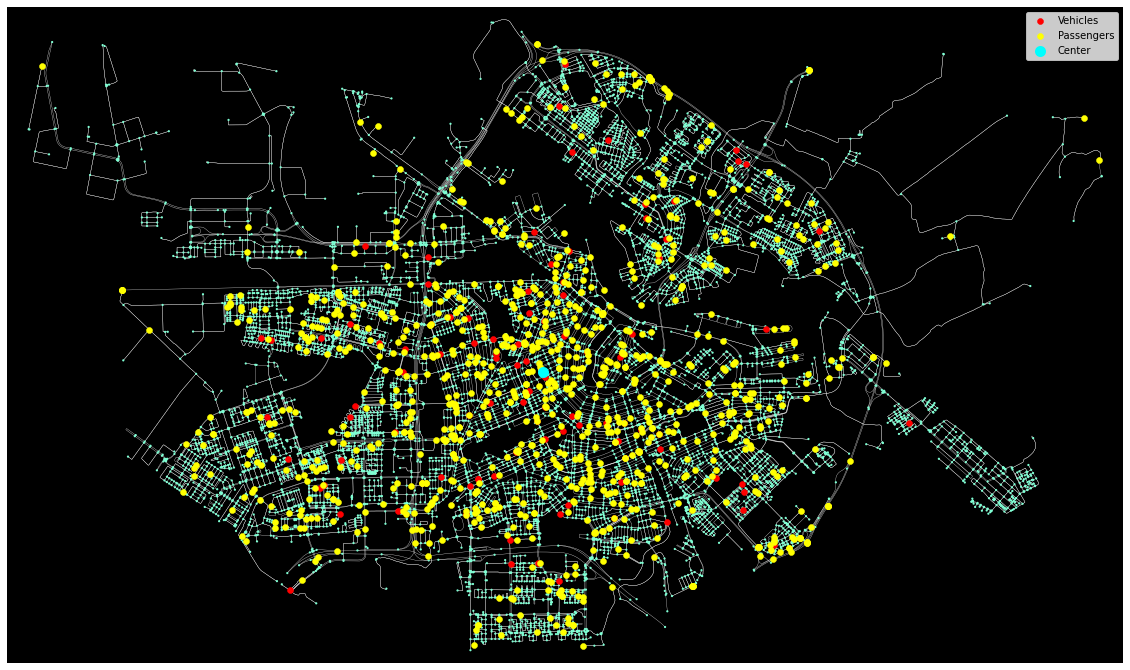

In [7]:
vehicles_position = sim_cm.vehicle_fixed_positions
veh_lx=[]
veh_ly=[]
for i in vehicles_position:
    veh_lx.append(sim_cm.inData.G.nodes[i]['x'])
    veh_ly.append(sim_cm.inData.G.nodes[i]['y'])
    
passengers_position = sim_cm.inData.passengers.pos
pass_lx=[]
pass_ly=[]
for i in passengers_position:
    pass_lx.append(sim_cm.inData.G.nodes[i]['x'])
    pass_ly.append(sim_cm.inData.G.nodes[i]['y'])

fig, ax = ox.plot_graph(sim_cm.inData.G, figsize=(20, 20), node_size=5, edge_linewidth=0.3,
                            show=False, close=False, node_color='aquamarine',
                            edge_color='white', bgcolor='black')

scat = plt.scatter(x=veh_lx, y=veh_ly,c='red',linewidths=0.5, label='Vehicles')
scat = plt.scatter(x=pass_lx, y=pass_ly,c='yellow',linewidths=0.5, label='Passengers')
#scat = plt.scatter(x=l_x, y=l_y,c='tab:red',linewidths=1)
scat = plt.scatter(x=sim_cm.inData.G.nodes[sim_cm.inData.stats.center]['x'], 
                   y=sim_cm.inData.G.nodes[sim_cm.inData.stats.center]['y'],c='aqua',linewidths=5,
                   label='Center')

plt.legend()

In [23]:
sim_cm.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,AR,nV
sum,3909.963925,2175.311000,7790.000000,588.000000,455.000000,133.000000,200450.000000,2004.500000,2676.436000,501.125000,13896.000000,60-7070-8060 or less90-10090-10070-8060 or les...,50
mean,78.199278,43.506220,155.800000,11.760000,9.100000,2.660000,4009.000000,40.090000,53.528720,10.022500,277.920000,NaN,50
std,10.981488,4.839853,45.531779,1.813329,1.313198,1.636447,464.768233,4.647682,5.146626,1.161921,271.500129,NaN,50


In [24]:
sim_cm.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,AR
veh,,,,,,,,,,,,
1,64.285714,41.8905,80.0,14,9,5.0,4023.0,40.23,51.948,10.0575,760,60-70
2,72.727273,40.8885,176.0,11,8,3.0,4051.0,40.51,51.016,10.1275,164,70-80
3,57.142857,33.2500,208.0,14,8,6.0,3876.0,38.76,42.940,9.6900,756,60 or less
4,91.666667,47.8260,241.0,12,11,1.0,4204.0,42.04,58.336,10.5100,37,90-100
5,100.000000,48.3475,178.0,11,11,0.0,4125.0,41.25,58.660,10.3125,0,90-100
6,72.727273,36.7855,196.0,11,8,3.0,3633.0,36.33,45.868,9.0825,137,70-80
7,60.000000,41.3690,161.0,15,9,6.0,3910.0,39.10,51.144,9.7750,684,60 or less
8,90.000000,43.2300,116.0,10,9,1.0,3612.0,36.12,52.260,9.0300,51,90-100
9,53.846154,35.3505,200.0,13,7,6.0,3575.0,35.75,44.288,8.9375,797,60 or less


In [25]:
sim_cm.res[0].veh_AR

AR                      60 or less        60-70        70-80        80-90  \
ACCEPTANCE_RATE count     4.000000     8.000000    16.000000    14.000000   
                mean     56.636142    66.928800    76.234703    83.856520   
                std       2.615594     2.902813     3.205994     2.164193   
                min      53.846154    62.500000    71.428571    81.818182   
                25%      55.128205    64.285714    72.727273    82.196970   
                50%      56.349206    67.948718    75.961538    83.333333   
                75%      57.857143    69.230769    80.000000    84.294872   
                max      60.000000    70.000000    80.000000    88.888889   
PROFIT          count     4.000000     8.000000    16.000000    14.000000   
                mean     39.833125    39.292000    42.683469    45.144179   
                std       7.225162     3.303352     3.879307     3.940397   
                min      33.250000    34.113000    36.785500    38.402000   
                25%      34.825375    36.838250    39.926750    42.443375   
                50%      38.359750    39.704250    43.127750    45.312000   
                75%      43.367500    42.103875    44.745125    48.917375   
                max      49.363000    43.061000    49.283000    50.463500   
IDLE_TIME       count     4.000000     8.000000    16.000000    14.000000   
                mean    172.750000   169.375000   159.062500   147.857143   
                std      39.575876    55.846569    50.540372    32.526574   
                min     122.000000    80.000000    71.000000    96.000000   
                25%     151.250000   152.000000   121.000000   125.000000   
                50%     180.500000   193.500000   173.500000   154.500000   
                75%     202.000000   203.000000   197.250000   165.750000   
                max     208.000000   222.000000   229.000000   210.000000   
nREQUESTS       count     4.000000     8.000000    16.000000    14.000000   
                mean     15.000000    12.125000    11.500000    11.428571   
                std       2.160247     2.100170     1.414214     1.504572   
                min      13.000000     8.000000    10.000000     8.000000   
                25%      13.750000    11.500000    10.000000    11.000000   
                50%      14.500000    13.000000    11.000000    12.000000   
                75%      15.750000    13.250000    12.250000    12.000000   
                max      18.000000    14.000000    14.000000    14.000000   
nRIDES          count     4.000000     8.000000    16.000000    14.000000   
                mean      8.500000     8.125000     8.750000     9.571429   
                std       1.290994     1.457738     1.000000     1.222500   
                min       7.000000     5.000000     8.000000     7.000000   
                25%       7.750000     7.750000     8.000000     9.000000   
                50%       8.500000     9.000000     8.000000    10.000000   
                75%       9.250000     9.000000     9.250000    10.000000   
                max      10.000000     9.000000    11.000000    12.000000   
nREJECTS        count     4.000000     8.000000    16.000000    14.000000   
                mean      6.500000     4.000000     2.750000     1.857143   
                std       1.000000     0.755929     0.577350     0.363137   
                min       6.000000     3.000000     2.000000     1.000000   
                25%       6.000000     3.750000     2.000000     2.000000   
                50%       6.000000     4.000000     3.000000     2.000000   
                75%       6.500000     4.250000     3.000000     2.000000   
                max       8.000000     5.000000     4.000000     2.000000   
DRIVING_TIME    count     4.000000     8.000000    16.000000    14.000000   
                mean   3952.750000  4033.000000  4042.812500  4027.928571   
                std     364.083667   415.624487   493.204247   603.071939

In [26]:
sim_cm.res[0].pax_exp[0:100]

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,4.0,262.0,0.0,606.0,False
1,48.0,16.0,0.0,740.0,False
2,72.0,29.0,0.0,413.0,False
3,40.0,88.0,0.0,620.0,False
4,148.0,4.0,0.0,346.0,False
5,116.0,188.0,0.0,439.0,False
6,184.0,25.0,0.0,545.0,False
7,172.0,46.0,0.0,446.0,False
8,92.0,201.0,0.0,198.0,False


In [27]:
sim_cm.res[0].pax_exp[sim_cm.res[0].pax_exp.veh_id=='Unfulfilled'].count()

veh_id           523
WAIT_TIME        523
nREJECTS         523
TRAVEL_TIME      523
LOST_PATIENCE    523
dtype: int64

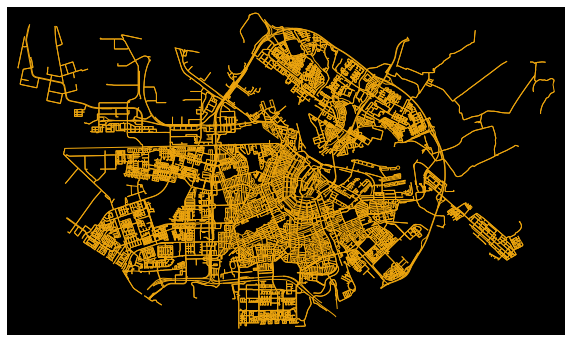

In [ ]:
G = sim_cm.inData.G
fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False, node_size=0, bgcolor='black', 
                        edge_color=(0.933, 0.65, 0.059))

In [14]:
sim_R50 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline_R50, kpi_veh=RA_kpi_veh, kpi_pax=RA_kpi_pax)

10-05-22 20:31:46-WARNING-Setting up 1h simulation at 2022-05-10 20:00:57 for 50 vehicles and 1000 passengers in Amsterdam, Netherlands
10-05-22 20:31:57-INFO--------------------	Starting simulation	-------------------
10-05-22 20:31:58-WARNING-pax    3  got rejected by vehicle 47               2022-05-10 20:01:00
10-05-22 20:31:58-WARNING-pax    3  got rejected by vehicle 45               2022-05-10 20:01:00
10-05-22 20:31:58-WARNING-pax    4  got rejected by vehicle 16               2022-05-10 20:01:02
10-05-22 20:31:58-WARNING-pax    6  got rejected by vehicle 33               2022-05-10 20:01:03
10-05-22 20:31:58-WARNING-pax    6  got rejected by vehicle 22               2022-05-10 20:01:03
10-05-22 20:31:58-WARNING-pax    6  got rejected by vehicle 6                2022-05-10 20:01:03
10-05-22 20:31:59-WARNING-pax   11  got rejected by vehicle 17               2022-05-10 20:01:40
10-05-22 20:31:59-WARNING-pax   11  got rejected by vehicle 29               2022-05-10 20:01:40
10-05

In [15]:
sim_R50.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR,nV
sum,2445.222984,2008.234000,7864.00000,849.000000,418.000000,427.000000,188908.000000,1889.080000,2480.504000,472.270000,60068.000000,1275.00000,60 or less60 or less60 or less60 or less60 or ...,50
mean,48.904460,40.164680,157.28000,16.980000,8.360000,8.540000,3778.160000,37.781600,49.610080,9.445400,1201.360000,25.50000,NaN,50
std,3.150604,7.544613,72.65716,3.371489,1.804303,1.716784,712.181654,7.121817,8.985117,1.780454,463.202374,14.57738,NaN,50


In [16]:
sim_R50.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR
veh,,,,,,,,,,,,,
1,50.000000,38.4635,90.0,20,10,10,3645.0,36.45,47.576,9.1125,1147,1,60 or less
2,50.000000,42.8100,90.0,20,10,10,3668.0,36.68,51.980,9.1700,1098,2,60 or less
3,50.000000,39.8550,221.0,18,9,9,3618.0,36.18,48.900,9.0450,1748,3,60 or less
4,50.000000,42.8615,127.0,18,9,9,3745.0,37.45,52.224,9.3625,1337,4,60 or less
5,50.000000,49.1585,145.0,20,10,10,4599.0,45.99,60.656,11.4975,1962,5,60 or less
6,47.368421,38.5915,196.0,19,9,10,3509.0,35.09,47.364,8.7725,442,6,60 or less
7,37.500000,14.1460,0.0,8,3,4,1100.0,11.00,16.896,2.7500,171,7,60 or less
8,47.368421,44.4500,93.0,19,9,10,3628.0,36.28,53.520,9.0700,1429,8,60 or less
9,50.000000,44.0000,137.0,18,9,9,3664.0,36.64,53.160,9.1600,1646,9,60 or less


In [17]:
sim_R50.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,4.0,646.0,0.0,136.0,False
1,8.0,323.0,0.0,513.0,False
2,76.0,192.0,0.0,482.0,False
3,124.0,212.0,2.0,678.0,False
4,116.0,372.0,1.0,799.0,False
...,...,...,...,...,...
995,76.0,1002.0,0.0,710.0,False
996,44.0,46.0,0.0,263.0,False
997,80.0,351.0,0.0,416.0,False


In [18]:
sim_R50.res[0].pax_exp[sim_R50.res[0].pax_exp.veh_id=='Unfulfilled'].count()

veh_id           483
WAIT_TIME        483
nREJECTS         483
TRAVEL_TIME      483
LOST_PATIENCE    483
dtype: int64

In [19]:
sim_R75 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline_R75, kpi_veh=RA_kpi_veh, kpi_pax=RA_kpi_pax)

10-05-22 20:35:28-WARNING-Setting up 1h simulation at 2022-05-10 20:02:53 for 50 vehicles and 1000 passengers in Amsterdam, Netherlands
10-05-22 20:35:50-INFO--------------------	Starting simulation	-------------------
10-05-22 20:35:51-WARNING-pax    1  got rejected by vehicle 18               2022-05-10 20:02:55
10-05-22 20:35:51-WARNING-pax    1  got rejected by vehicle 31               2022-05-10 20:02:55
10-05-22 20:35:51-WARNING-pax    2  got rejected by vehicle 30               2022-05-10 20:02:56
10-05-22 20:35:51-WARNING-pax    3  got rejected by vehicle 19               2022-05-10 20:02:59
10-05-22 20:35:51-WARNING-pax    3  got rejected by vehicle 42               2022-05-10 20:02:59
10-05-22 20:35:51-WARNING-pax    3  got rejected by vehicle 41               2022-05-10 20:02:59
10-05-22 20:35:51-WARNING-pax    3  got rejected by vehicle 2                2022-05-10 20:02:59
10-05-22 20:35:51-WARNING-pax    6  got rejected by vehicle 35               2022-05-10 20:03:06
10-05

In [20]:
sim_R75.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR,nV
sum,3667.347652,2004.41050,6721.000000,584.000000,426.000000,156.000000,202247.00000,2022.470000,2510.028000,505.617500,16778.000000,1275.00000,90-10060-7070-8070-8070-8070-8070-8070-8070-80...,50
mean,73.346953,40.08821,134.420000,11.680000,8.520000,3.120000,4044.94000,40.449400,50.200560,10.112350,335.560000,25.50000,NaN,50
std,4.803758,11.00953,49.754536,2.683586,1.981959,0.848528,1088.06033,10.880603,10.046433,2.720151,243.306405,14.57738,NaN,50


In [21]:
sim_R75.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR
veh,,,,,,,,,,,,,
1,100.000000,-19.6725,0.0,1,1,0.0,10325.0,103.25,6.140,25.8125,0,1,90-100
2,69.230769,47.1725,100.0,13,9,4.0,3547.0,35.47,56.040,8.8675,294,2,60-70
3,71.428571,45.8430,96.0,14,10,4.0,4322.0,43.22,56.648,10.8050,872,3,70-80
4,75.000000,44.0215,94.0,12,9,3.0,3737.0,37.37,53.364,9.3425,343,4,70-80
5,75.000000,39.6850,192.0,12,9,3.0,3566.0,35.66,48.600,8.9150,68,5,70-80
6,71.428571,38.8375,184.0,14,10,4.0,3745.0,37.45,48.200,9.3625,505,6,70-80
7,75.000000,38.4710,165.0,12,9,3.0,3970.0,39.70,48.396,9.9250,354,7,70-80
8,75.000000,28.5840,177.0,8,6,2.0,4248.0,42.48,39.204,10.6200,33,8,70-80
9,73.333333,45.7970,122.0,15,11,4.0,3686.0,36.86,55.012,9.2150,660,9,70-80


In [22]:
sim_R75.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,4.0,9980.0,0.0,345.0,False
1,133.0,180.0,2.0,423.0,False
2,158.0,127.0,1.0,206.0,False
3,116.0,227.0,4.0,369.0,False
4,8.0,6.0,0.0,236.0,False
...,...,...,...,...,...
995,96.0,481.0,0.0,329.0,False
996,176.0,905.0,0.0,424.0,False
997,80.0,857.0,0.0,655.0,False


In [23]:
sim_R75.res[0].pax_exp[sim_R75.res[0].pax_exp.veh_id=='Unfulfilled'].count()

veh_id           544
WAIT_TIME        544
nREJECTS         544
TRAVEL_TIME      544
LOST_PATIENCE    544
dtype: int64

In [8]:
sim_R100 = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline_R100, kpi_veh=RA_kpi_veh, kpi_pax=RA_kpi_pax)

11-05-22 10:37:41-WARNING-Setting up 1h simulation at 2022-05-11 10:06:55 for 50 vehicles and 1000 passengers in Amsterdam, Netherlands
11-05-22 10:37:51-INFO--------------------	Starting simulation	-------------------
11-05-22 10:37:55-INFO-pax    6  got to dest at                           2022-05-11 10:12:03
11-05-22 10:37:55-INFO-pax    5  got to dest at                           2022-05-11 10:12:31
11-05-22 10:37:55-INFO-pax    8  got to dest at                           2022-05-11 10:13:08
11-05-22 10:37:55-INFO-pax    3  got to dest at                           2022-05-11 10:13:49
11-05-22 10:37:55-INFO-pax    9  got to dest at                           2022-05-11 10:14:13
11-05-22 10:37:55-INFO-pax   12  got to dest at                           2022-05-11 10:15:03
11-05-22 10:37:55-INFO-pax   14  got to dest at                           2022-05-11 10:15:12
11-05-22 10:37:55-INFO-pax   20  got to dest at                           2022-05-11 10:15:20
11-05-22 10:37:56-INFO-pax   

In [9]:
sim_R100.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR,nV
sum,4962.500000,2130.761000,9099.00000,455.000000,453.000000,0.0,194518.000000,1945.180000,2617.056000,486.295000,0.0,1275.00000,90-10090-10090-10090-10090-10090-10090-10090-1...,50
mean,99.250000,42.615220,181.98000,9.100000,9.060000,0.0,3890.360000,38.903600,52.341120,9.725900,0.0,25.50000,NaN,50
std,3.920446,6.316923,64.27952,1.474269,1.570259,0.0,468.271671,4.682717,7.071487,1.170679,0.0,14.57738,NaN,50


In [10]:
sim_R100.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR
veh,,,,,,,,,,,,,
1,100.0,46.2520,100.0,11,11,0.0,4056.0,40.56,56.392,10.1400,0,1,90-100
2,100.0,45.6820,81.0,9,9,0.0,3764.0,37.64,55.092,9.4100,0,2,90-100
3,100.0,44.5805,277.0,10,10,0.0,4755.0,47.55,56.468,11.8875,0,3,90-100
4,100.0,40.6455,278.0,10,10,0.0,3953.0,39.53,50.528,9.8825,0,4,90-100
5,100.0,47.3580,117.0,10,10,0.0,3932.0,39.32,57.188,9.8300,0,5,90-100
6,100.0,44.7510,270.0,9,9,0.0,3642.0,36.42,53.856,9.1050,0,6,90-100
7,100.0,36.4210,250.0,9,9,0.0,3446.0,34.46,45.036,8.6150,0,7,90-100
8,100.0,44.9690,234.0,11,11,0.0,3446.0,34.46,53.584,8.6150,0,8,90-100
9,100.0,48.7255,221.0,10,10,0.0,3865.0,38.65,58.388,9.6625,0,9,90-100


In [13]:
sim_R100.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,4.0,117.0,0.0,316.0,False
1,8.0,131.0,0.0,850.0,False
2,68.0,152.0,0.0,382.0,False
3,48.0,70.0,0.0,248.0,False
4,20.0,80.0,0.0,352.0,False
...,...,...,...,...,...
995,20.0,717.0,0.0,229.0,False
996,52.0,114.0,0.0,369.0,False
997,12.0,1188.0,0.0,730.0,False


In [12]:
sim_R100.res[0].pax_exp[sim_R100.res[0].pax_exp.veh_id=='Unfulfilled'].count()

veh_id           547
WAIT_TIME        547
nREJECTS         547
TRAVEL_TIME      547
LOST_PATIENCE    547
dtype: int64

In [14]:
sim_mixed = MaaSSim.simulators.simulate(params=params, f_driver_decline=f_decline_mixed, kpi_veh=RA_kpi_veh, kpi_pax=RA_kpi_pax)

11-05-22 10:39:45-WARNING-Setting up 1h simulation at 2022-05-11 10:08:52 for 50 vehicles and 1000 passengers in Amsterdam, Netherlands
11-05-22 10:39:56-INFO--------------------	Starting simulation	-------------------
11-05-22 10:39:57-WARNING-pax    0  got rejected by vehicle 1                2022-05-11 10:08:52
11-05-22 10:39:57-WARNING-Nobody likes each other, Qs 1veh; 1req; tabu 2
11-05-22 10:39:57-WARNING-pax    1  got rejected by vehicle 12               2022-05-11 10:08:56
11-05-22 10:39:57-WARNING-pax    2  got rejected by vehicle 20               2022-05-11 10:08:58
11-05-22 10:39:57-WARNING-pax    3  got rejected by vehicle 30               2022-05-11 10:09:00
11-05-22 10:39:57-WARNING-pax    3  got rejected by vehicle 10               2022-05-11 10:09:00
11-05-22 10:39:57-WARNING-pax    3  got rejected by vehicle 21               2022-05-11 10:09:00
11-05-22 10:39:58-WARNING-pax    9  got rejected by vehicle 27               2022-05-11 10:09:23
11-05-22 10:39:58-WARNING-pax

In [15]:
sim_mixed.res[0].veh_kpi

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR,nV
sum,3712.229437,2042.895500,8131.000000,619.000000,430.000000,188.000000,193677.000000,1936.77000,2527.088000,484.192500,22932.000000,1275.00000,60 or less60 or less60 or less60 or less60 or ...,50
mean,74.244589,40.857910,162.620000,12.380000,8.600000,3.760000,3873.540000,38.73540,50.541760,9.683850,458.640000,25.50000,NaN,50
std,20.261435,7.116517,55.987203,3.880301,1.616244,3.554589,551.481981,5.51482,8.075143,1.378705,429.922668,14.57738,NaN,50


In [16]:
sim_mixed.res[0].veh_exp

,ACCEPTANCE_RATE,PROFIT,IDLE_TIME,nREQUESTS,nRIDES,nREJECTS,DRIVING_TIME,DRIVING_DIST,REVENUE,COST,IMPOSED_DELAY,veh,AR
veh,,,,,,,,,,,,,
1,50.000000,27.0535,210.0,12,6,6.0,3593.0,35.93,36.036,8.9825,548,1,60 or less
2,50.000000,34.1555,70.0,16,8,8.0,3677.0,36.77,43.348,9.1925,465,2,60 or less
3,50.000000,47.0560,135.0,18,9,9.0,4160.0,41.60,57.456,10.4000,721,3,60 or less
4,50.000000,35.8230,207.0,18,9,9.0,4002.0,40.02,45.828,10.0050,954,4,60 or less
5,50.000000,35.8920,134.0,14,7,7.0,3632.0,36.32,44.972,9.0800,551,5,60 or less
6,50.000000,29.2570,235.0,14,7,7.0,3550.0,35.50,38.132,8.8750,1221,6,60 or less
7,50.000000,39.0265,179.0,16,8,8.0,3519.0,35.19,47.824,8.7975,951,7,60 or less
8,50.000000,35.5580,192.0,14,7,7.0,3756.0,37.56,44.948,9.3900,481,8,60 or less
9,50.000000,40.9465,104.0,18,9,9.0,3647.0,36.47,50.064,9.1175,1558,9,60 or less


In [17]:
sim_mixed.res[0].pax_exp

,veh_id,WAIT_TIME,nREJECTS,TRAVEL_TIME,LOST_PATIENCE
pax,,,,,
0,9.0,727.0,1.0,497.0,False
1,140.0,264.0,1.0,688.0,False
2,164.0,227.0,1.0,317.0,False
3,197.0,92.0,3.0,597.0,False
4,156.0,12.0,0.0,542.0,False
...,...,...,...,...,...
995,202.0,1263.0,1.0,954.0,False
996,64.0,457.0,0.0,555.0,False
997,68.0,350.0,1.0,241.0,False


In [18]:
sim_mixed.res[0].pax_exp[sim_R100.res[0].pax_exp.veh_id=='Unfulfilled'].count()

veh_id           547
WAIT_TIME        547
nREJECTS         547
TRAVEL_TIME      547
LOST_PATIENCE    547
dtype: int64

In [19]:
sim_mixed.res[0].veh_AR

AR                      60 or less        60-70        70-80       90-100
ACCEPTANCE_RATE count    16.000000     3.000000    15.000000    16.000000
                mean     50.000000    70.000000    73.481962   100.000000
                std       0.000000     0.000000     1.574971     0.000000
                min      50.000000    70.000000    71.428571   100.000000
                25%      50.000000    70.000000    72.077922   100.000000
                50%      50.000000    70.000000    73.333333   100.000000
                75%      50.000000    70.000000    75.000000   100.000000
                max      50.000000    70.000000    75.000000   100.000000
PROFIT          count    16.000000     3.000000    15.000000    16.000000
                mean     38.100656    39.991500    40.088267    44.499156
                std       6.115942     3.467052     9.470233     4.442030
                min      27.053500    36.513500    12.746500    35.755000
                25%      35.207375    38.263500    39.441250    42.453250
                50%      37.399500    40.013500    42.844500    44.460000
                75%      42.153875    41.730500    44.493750    47.335000
                max      47.841500    43.447500    50.589000    51.681000
IDLE_TIME       count    16.000000     3.000000    15.000000    16.000000
                mean    166.000000   151.666667   160.200000   163.562500
                std      55.580572    78.245341    63.722837    50.011957
                min      70.000000   105.000000     0.000000    79.000000
                25%     127.000000   106.500000   132.500000   124.000000
                50%     168.000000   108.000000   182.000000   158.500000
                75%     209.250000   175.000000   200.000000   198.750000
                max     248.000000   242.000000   230.000000   244.000000
nREQUESTS       count    16.000000     3.000000    15.000000    16.000000
                mean     16.750000    10.000000    11.533333     9.250000
                std       2.720294     0.000000     2.799660     1.341641
                min      12.000000    10.000000     4.000000     6.000000
                25%      15.500000    10.000000    11.000000     9.000000
                50%      16.000000    10.000000    12.000000     9.500000
                75%      18.000000    10.000000    13.000000    10.000000
                max      22.000000    10.000000    15.000000    11.000000
nRIDES          count    16.000000     3.000000    15.000000    16.000000
                mean      8.375000     7.000000     8.466667     9.250000
                std       1.360147     0.000000     2.030717     1.341641
                min       6.000000     7.000000     3.000000     6.000000
                25%       7.750000     7.000000     8.000000     9.000000
                50%       8.000000     7.000000     9.000000     9.500000
                75%       9.000000     7.000000     9.500000    10.000000
                max      11.000000     7.000000    11.000000    11.000000
nREJECTS        count    16.000000     3.000000    15.000000    16.000000
                mean      8.375000     3.000000     3.000000     0.000000
                std       1.360147     0.000000     1.000000     0.000000
                min       6.000000     3.000000     0.000000     0.000000
                25%       7.750000     3.000000     3.000000     0.000000
                50%       8.000000     3.000000     3.000000     0.000000
                75%       9.000000     3.000000     3.500000     0.000000
                max      11.000000     3.000000     4.000000     0.000000
DRIVING_TIME    count    16.000000     3.000000    15.000000    16.000000
                mean   3748.937500  3901.000000  3810.666667  4051.937500
                std     237.057087   475.091570   844.586684   432.231955
                min    3428.000000  3605.000000  1151.000000  3577.000000
                25%    3612.500000  3627.000000  3663.500000  3735.250000
    